In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import mannwhitneyu, shapiro, chi2_contingency
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [3]:
df=pd.read_csv('flight_train.csv')
df=pd.DataFrame(df)
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
8232,46250,4/16/2007,4/16/2007,Male,4,tianjin,tianjin,CN,54.0,3/31/2014,...,14515.0,28510,3/22/2014,10,26.333333,107,2,0.879818,25425,2
37084,47313,7/15/2005,7/23/2005,Female,4,shanghai,shanghai,CN,33.0,3/31/2014,...,4772.0,8805,2/28/2014,33,68.166667,160,0,0.607449,4227,1
12881,7013,12/28/2012,12/28/2012,Male,4,dalian,liaoning,CN,56.0,3/31/2014,...,11555.0,29473,3/4/2014,28,19.636364,138,0,0.614015,12565,0
44383,5881,10/13/2011,10/13/2011,Male,4,NY,NY,US,39.0,3/31/2014,...,1470.0,2489,4/27/2013,340,37.000000,72,0,1.500000,3408,0
4822,8652,5/14/2007,5/14/2007,Male,5,changchun,jilin,CN,53.0,3/31/2014,...,9630.0,42605,3/12/2014,20,21.566667,102,0,0.816165,34892,1


In [4]:
unique_values=df.nunique()
print("\nNumber of unique values in each column:")
print(unique_values)


Number of unique values in each column:
MEMBER_NO            55000
FFP_DATE              3067
FIRST_FLIGHT_DATE     3395
GENDER                   2
FFP_TIER                 3
WORK_CITY             2956
WORK_PROVINCE         1061
WORK_COUNTRY           110
AGE                     83
LOAD_TIME                1
FLIGHT_COUNT           153
BP_SUM               22946
SUM_YR_1             15719
SUM_YR_2             16669
SEG_KM_SUM           28096
LAST_FLIGHT_DATE       729
LAST_TO_END            729
AVG_INTERVAL         10618
MAX_INTERVAL           691
EXCHANGE_COUNT          28
avg_discount         50060
Points_Sum           24406
Point_NotFlight         99
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          55000 non-null  int64  
 1   FFP_DATE           55000 non-null  object 
 2   FIRST_FLIGHT_DATE  55000 non-null  object 
 3   GENDER             54997 non-null  object 
 4   FFP_TIER           55000 non-null  int64  
 5   WORK_CITY          53034 non-null  object 
 6   WORK_PROVINCE      52216 non-null  object 
 7   WORK_COUNTRY       54980 non-null  object 
 8   AGE                54658 non-null  float64
 9   LOAD_TIME          55000 non-null  object 
 10  FLIGHT_COUNT       55000 non-null  int64  
 11  BP_SUM             55000 non-null  int64  
 12  SUM_YR_1           54738 non-null  float64
 13  SUM_YR_2           54937 non-null  float64
 14  SEG_KM_SUM         55000 non-null  int64  
 15  LAST_FLIGHT_DATE   55000 non-null  object 
 16  LAST_TO_END        550

In [6]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            1966
WORK_PROVINCE        2784
WORK_COUNTRY           20
AGE                   342
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              262
SUM_YR_2               63
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['FFP_TIER']=df['FFP_TIER'].astype(object)

In [9]:
numerical=['MEMBER_NO', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 
           'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 
           'Points_Sum', 'Point_NotFlight']
categorical=['FFP_DATE', 'FFP_TIER', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE',
             'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

In [10]:
df[numerical].describe()

,MEMBER_NO,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,55000.000000,54658.000000,55000.000000,55000.000000,54738.000000,54937.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.00000,55000.000000
mean,31549.707145,42.705789,13.213527,12362.465164,6002.575145,6325.644993,19256.688255,155.593436,62.979631,172.201745,0.361727,0.736753,14102.26780,2.827073
std,18177.005101,9.803796,14.528764,17012.468908,8458.072660,9080.805391,21613.796416,169.987954,64.506386,117.382011,1.201922,0.177283,21049.88039,7.526118
min,1.000000,6.000000,2.000000,0.000000,0.000000,0.000000,1380.000000,1.000000,0.000000,0.000000,0.000000,0.136017,0.00000,0.000000
25%,15798.750000,35.000000,4.000000,3497.000000,1400.000000,1300.000000,6332.000000,25.000000,25.166667,90.000000,0.000000,0.629210,3796.00000,0.000000
50%,31559.500000,42.000000,8.000000,6903.000000,3426.500000,3484.000000,11983.000000,91.000000,44.600000,149.000000,0.000000,0.720056,7611.00000,0.000000
75%,47322.250000,48.000000,16.000000,14481.000000,7406.000000,7760.000000,23761.500000,226.000000,77.500000,230.000000,0.000000,0.813888,16046.75000,1.000000
max,62988.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,730.000000,714.000000,719.000000,46.000000,1.500000,795398.00000,140.000000


In [11]:
df[categorical].describe()

,FFP_DATE,FFP_TIER,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,55000,55000,55000,54997,53034,52216,54980,55000,55000
unique,3067,3,3395,2,2956,1061,110,1,729
top,1/13/2011,4,9/9/2005,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,140,50124,76,42504,8348,15388,50413,55000,929


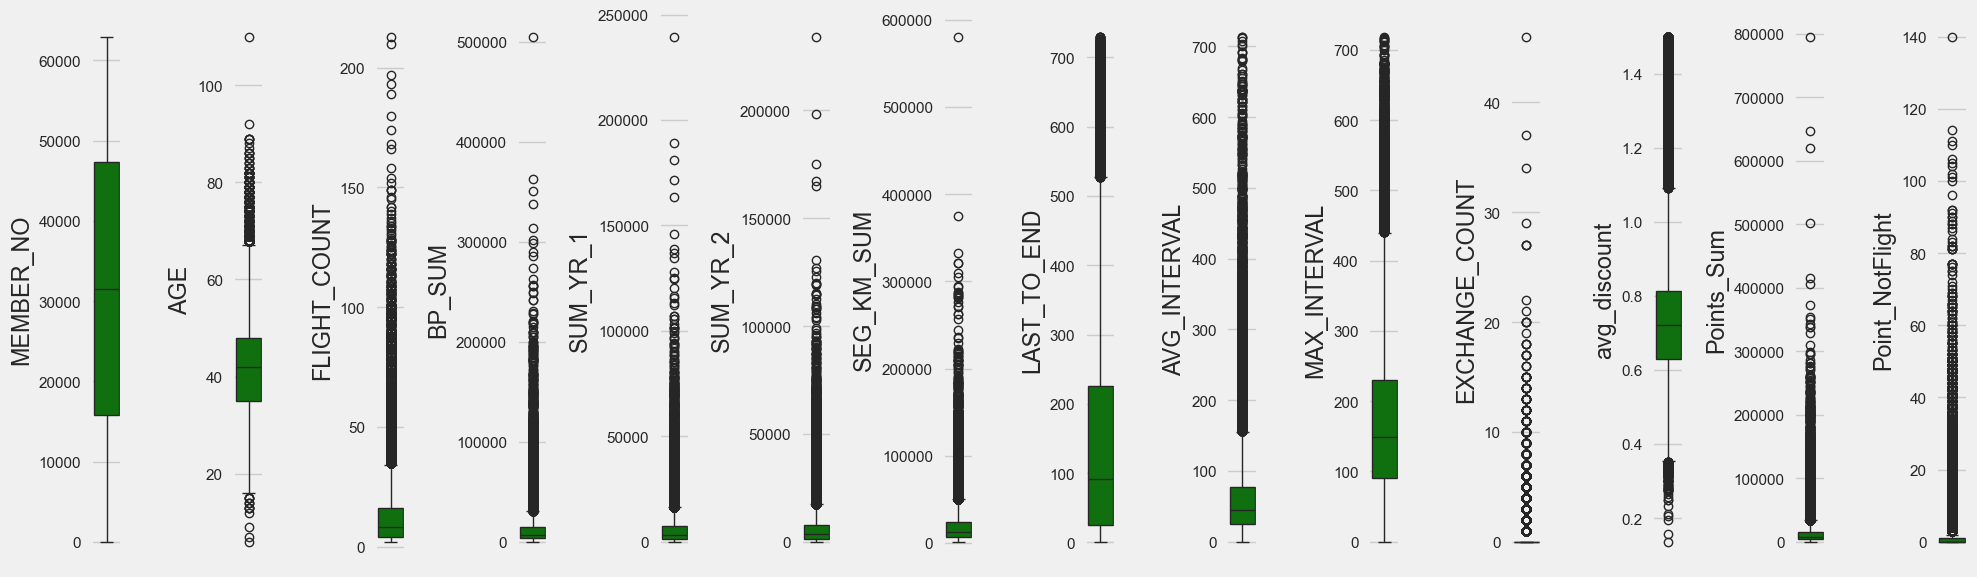

In [12]:
#Numerical Features
#Boxplot to see Outilers in Numerical values
plt.figure(figsize=(20,6))
for i in range(0, len(numerical)):
    plt.subplot(1, len(numerical), i+1)
    sns.boxplot(y=df[numerical[i]], color='green')
    plt.tight_layout()

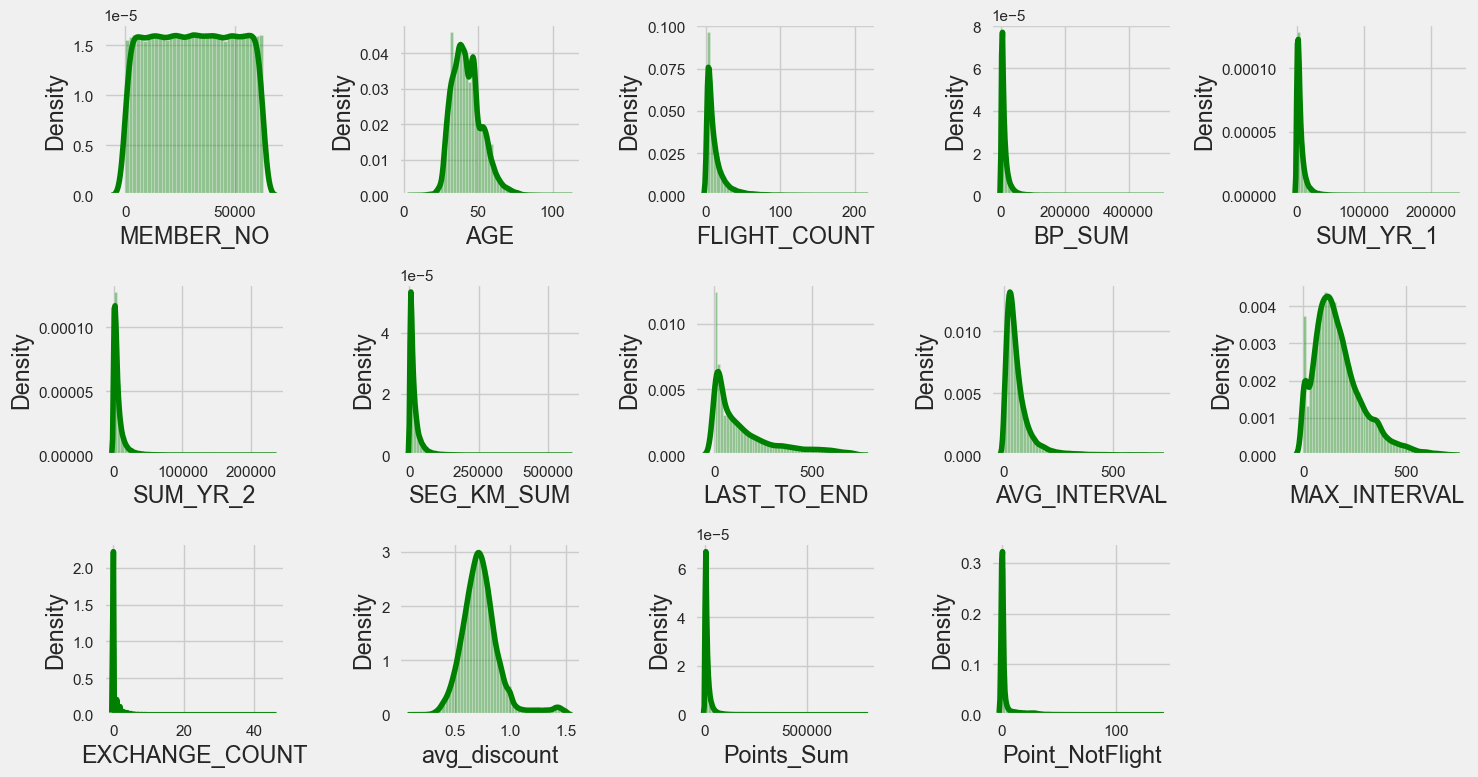

In [13]:
#Distplot to see the distrbution
plt.figure(figsize=(15,8))
for i in range(0, len(numerical)):
    plt.subplot(3, 5, i+1)
    sns.distplot(df[numerical[i]], color='green')
    plt.tight_layout()
plt.show()

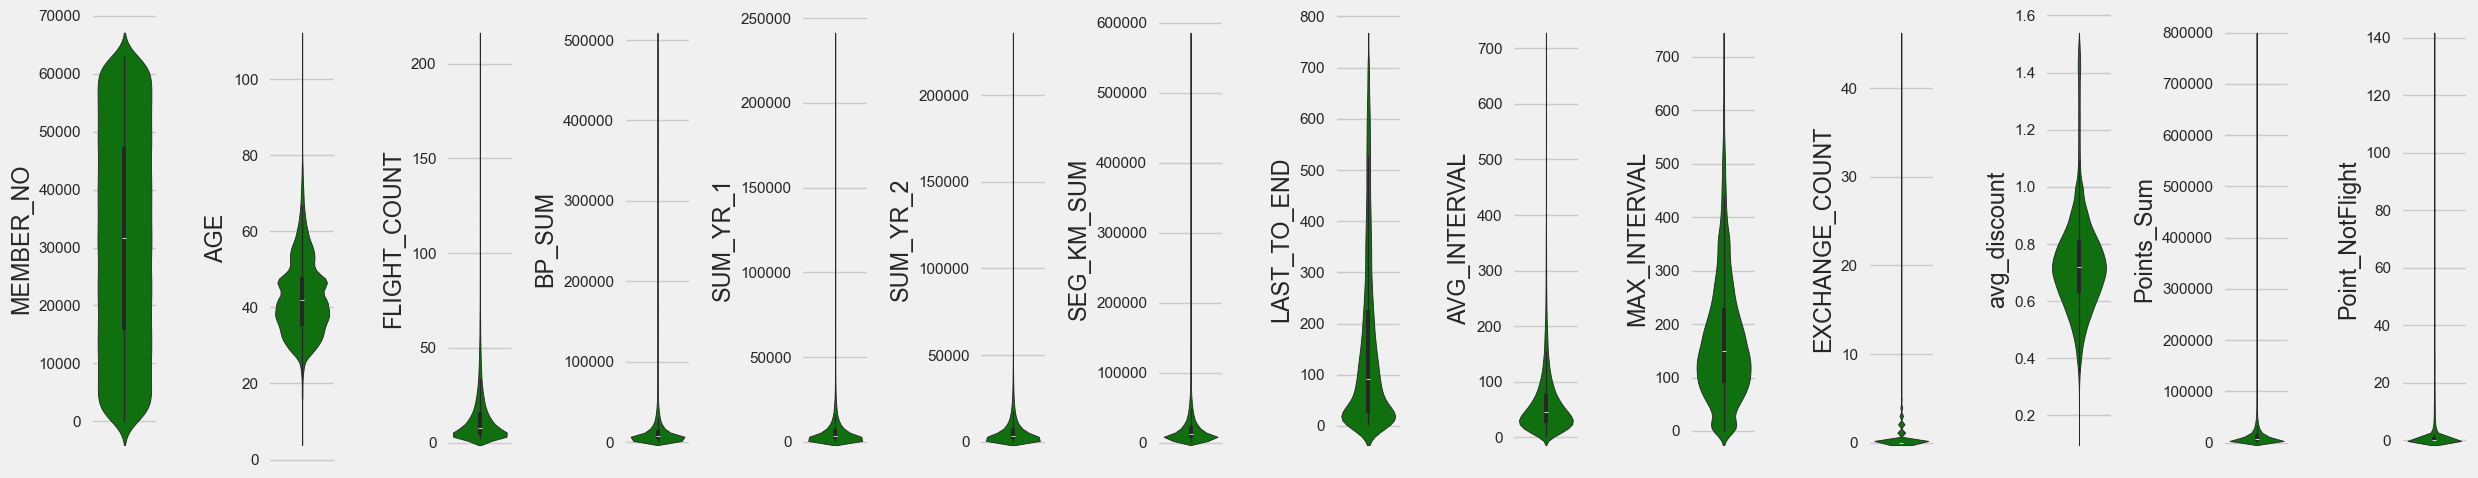

In [14]:
#Violinplot to see outliers and distribution
plt.figure(figsize=(25,5))
for i in range(0,len(numerical)):
    plt.subplot(1, len(numerical), i+1)
    sns.violinplot(y=df[numerical[i]], color='green')
    plt.tight_layout()

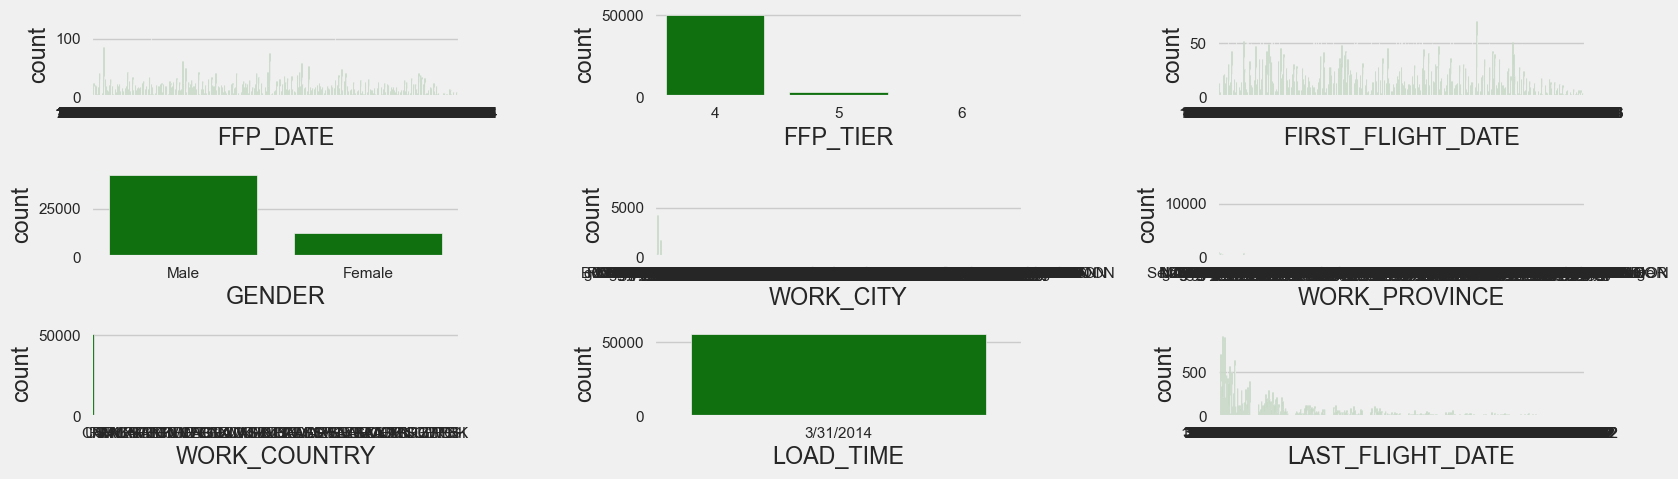

In [15]:
#Categorical features
#Countplot to see the distribution
plt.figure(figsize=(17,5))
for i in range(len(categorical)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical[i]], color='green')
plt.tight_layout()
plt.show()

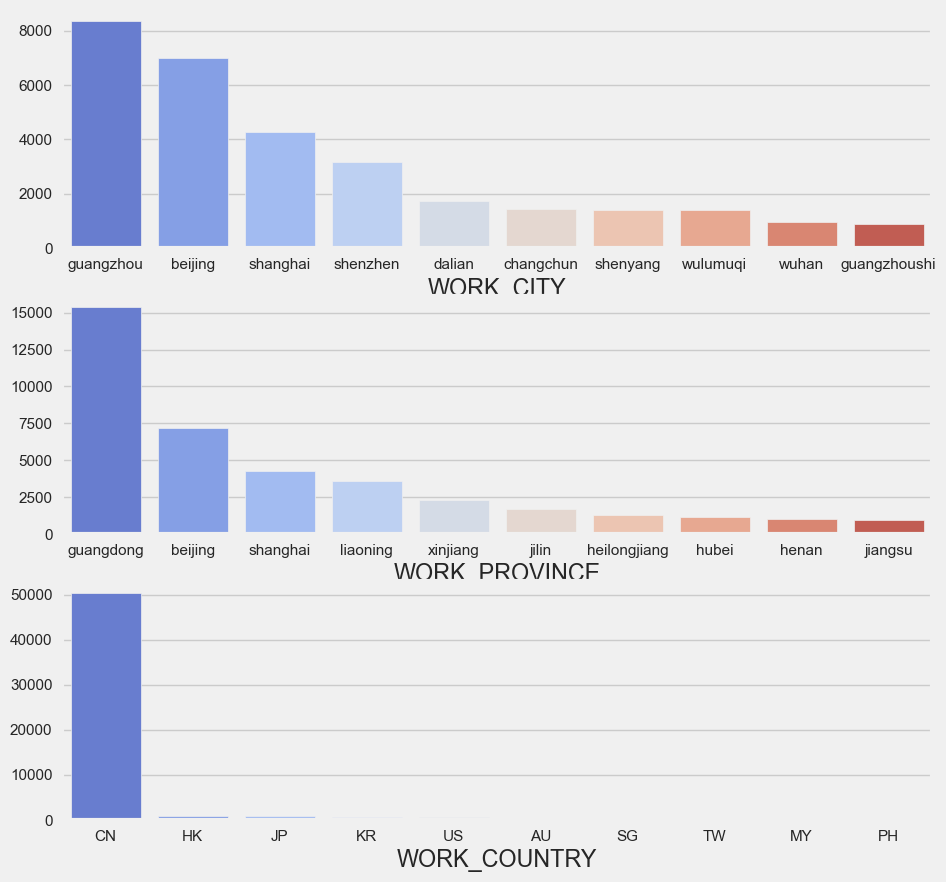

In [16]:
#Top 10 alues from WORK_CITY, WORK_PROVINCE, and WORK_COUNTRY
workcity=df['WORK_CITY'].value_counts().head(10)
workprovince=df['WORK_PROVINCE'].value_counts().head(10)
workcountry=df['WORK_COUNTRY'].value_counts().head(10)

fig, ax=plt.subplots(nrows=3, ncols=1, figsize=(10,10))

sns.barplot(x=workcity.index, y=workcity.values, ax=ax[0], palette='coolwarm')
sns.barplot(x=workprovince.index, y=workprovince.values, ax=ax[1], palette='coolwarm')
sns.barplot(x=workcountry.index, y=workcountry.values, ax=ax[2], palette='coolwarm')
plt.show()

In [17]:
#Function to check if the datatype of date columns in the dataframe can be changed to datetime format
def check_date(column):
    try:
        pd.to_datetime(column, errors='raise')
        return True
    except (ValueError, TypeError):
        return False

date_columns=['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LAST_FLIGHT_DATE']
errors={col: check_date(df[col]) for col in date_columns}

invalid_rows=[]
for col, is_valid in errors.items():
    if not is_valid:
        print(f"Column '{col}' contains invalid date formats")
        invalid_rows.extend(df[~df[col].apply(lambda x: check_date(pd.Series([x])))].index)

Column 'LAST_FLIGHT_DATE' contains invalid date formats


In [18]:
if invalid_rows:
    df=df.drop(index=invalid_rows).reset_index(drop=True)
    print(f" Dropped {len(invalid_rows)} rows with invalid date formats.")
else:
    df_cleaned=df.copy()
    print("No invalid date formats found")

 Dropped 400 rows with invalid date formats.


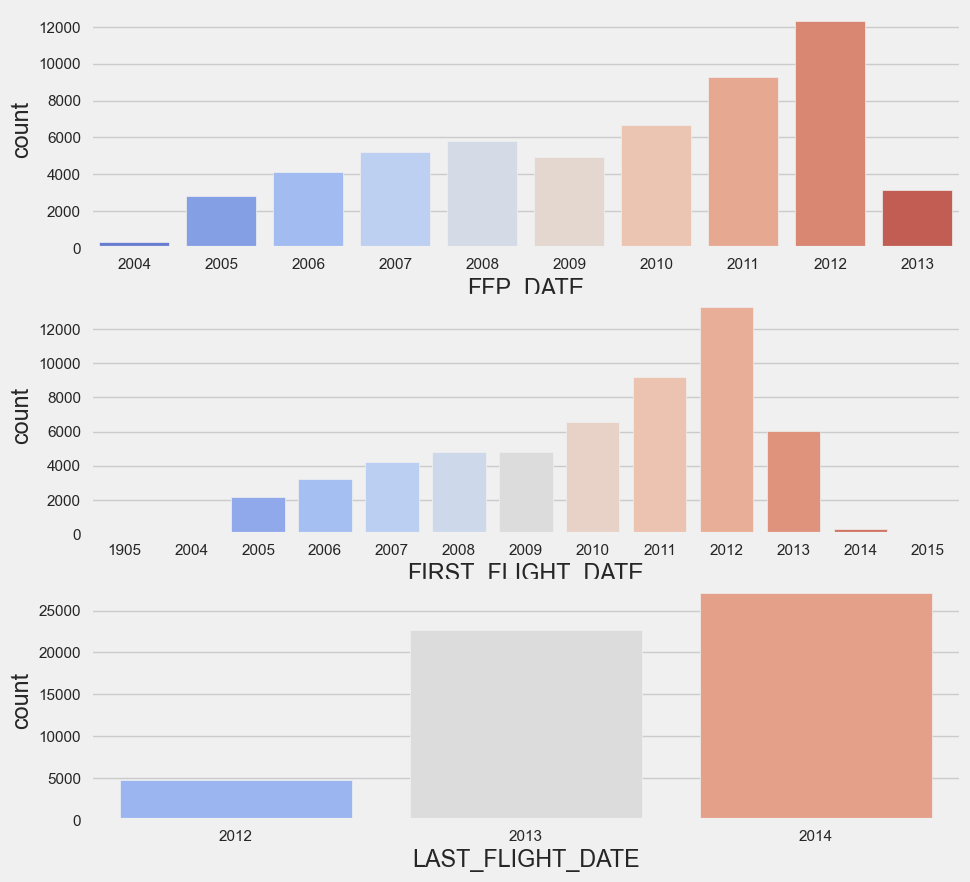

In [19]:
ffp=pd.to_datetime(df['FFP_DATE']).dt.year
firstflight=pd.to_datetime(df['FIRST_FLIGHT_DATE']).dt.year
lastflight=pd.to_datetime(df['LAST_FLIGHT_DATE']).dt.year

fig, ax=plt.subplots(nrows=3, ncols=1, figsize=(10,10))

sns.countplot(x=ffp, ax=ax[0], palette='coolwarm')
sns.countplot(x=firstflight, ax=ax[1], palette='coolwarm')
sns.countplot(x=lastflight, ax=ax[2], palette='coolwarm')
plt.show()

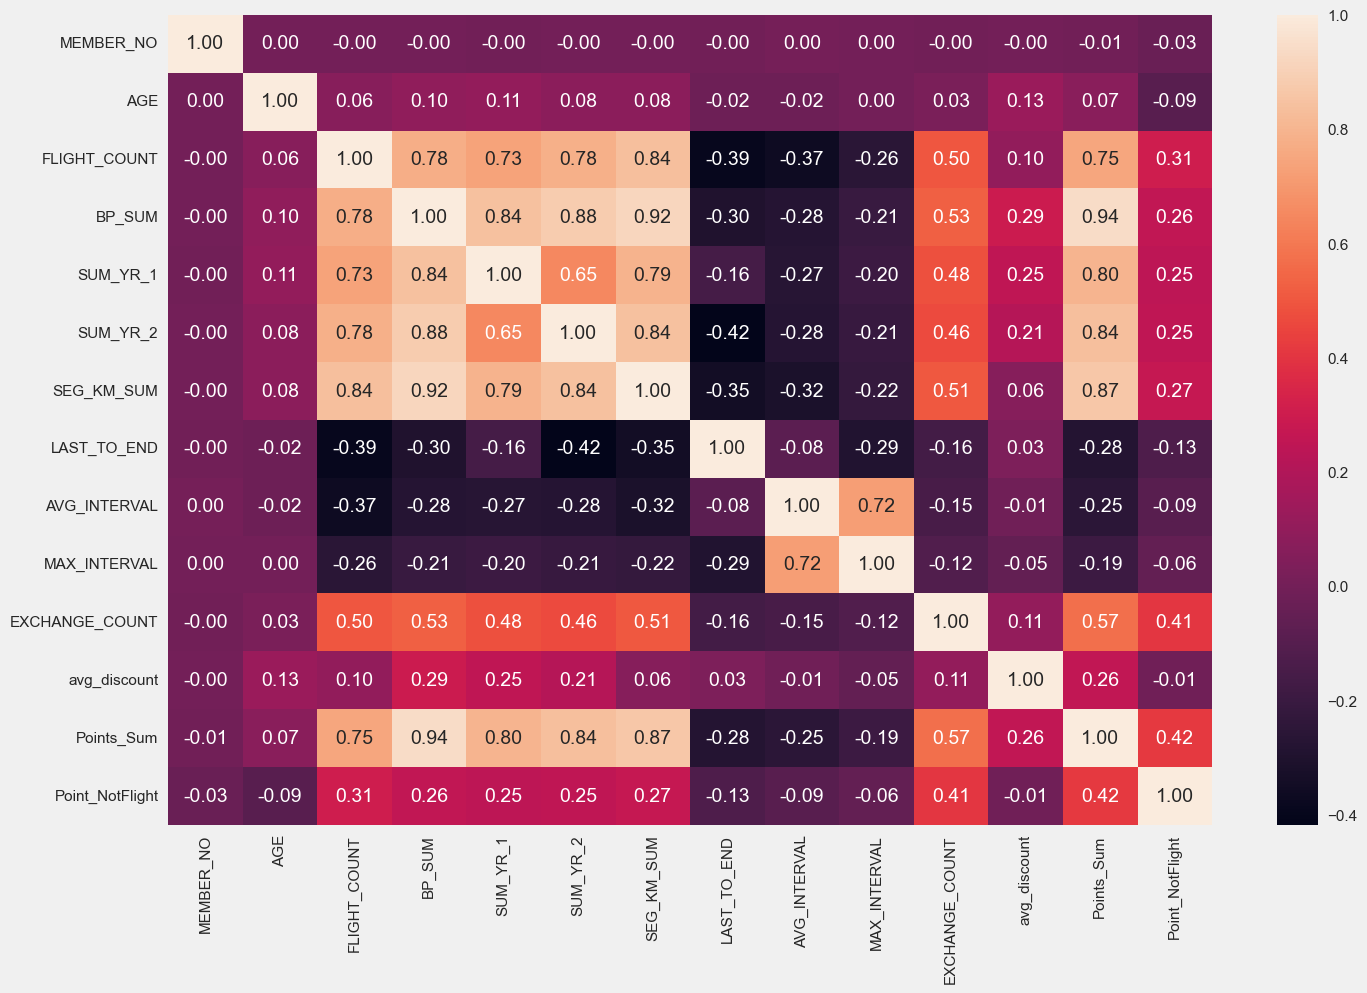

In [20]:
#Multivariate Analysis
plt.figure(figsize=(15,10))
sns.heatmap(df[numerical].corr(), annot=True, fmt='.2f')
plt.show()

In [ ]:
#Create a pairplot
plt.figure(figsize=(15,15))
sns.pairplot(df, diag_kind='kde')
plt.show()

<Figure size 1500x1500 with 0 Axes>

In [ ]:
#Data Preprocessing
#Handling Missing Values
#Calclate the number of missing values
missing_values=df.isnull().sum()

#Percentage of missing values
missing_percentage=(df.isnull().sum()/len(df)) * 100

missing_data=pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

print(missing_data)

In [ ]:
df_clean=df.copy()
#Modal values Replacement
df_clean['WORK_CITY'].fillna(df_clean['WORK_CITY'].mode()[0], inplace=True)
df_clean['WORK_PROVINCE'].fillna(df_clean['WORK_PROVINCE'].mode()[0], inplace=True)
df_clean['WORK_COUNTRY'].fillna(df_clean['WORK_COUNTRY'].mode()[0], inplace=True)
df_clean['GENDER'].fillna(df_clean['GENDER'].mode()[0], inplace=True)

#Mean values Replacement
df_clean['SUM_YR_1'].fillna(df_clean['SUM_YR_1'].mean(), inplace=True)
df_clean['SUM_YR_2'].fillna(df_clean['SUM_YR_2'].mean(), inplace=True)
df_clean['AGE'].fillna(df_clean['AGE'].mean(), inplace=True)

df_clean.isna().sum()

In [ ]:
#Feature Engineering
#Chaging the datatype of date columns
df_clean['FFP_DATE']=pd.to_datetime(df_clean['FFP_DATE'])
df_clean['LOAD_TIME']=pd.to_datetime(df_clean['LOAD_TIME'])

In [ ]:
df_clean['LOYALTY']=(df_clean['LOAD_TIME'].dt.year - df_clean['FFP_DATE'].dt.year)*12+(df_clean['LOAD_TIME'].dt.month - df_clean['FFP_DATE'].dt.month)
print(df_clean[['FFP_DATE', 'LOAD_TIME', 'LOYALTY']].sample(5))

In [ ]:
#Heatmap to see corelation between Numerical features after being cleaned
nums=['MEMBER_NO', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL',
     'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight', 'LOYALTY']
plt.figure(figsize=(15,10))
sns.heatmap(df_clean[nums].corr(), annot=True, fmt='.2f')

In [ ]:
x_columns=['LOYALTY', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'AVG_INTERVAL']
plt.figure(figsize=(15,7))
for i in range(0, len(x_columns)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=df_clean[x_columns[i]], color='green')
    plt.title(x_columns[i])
    plt.tight_layout()
plt.show()

In [ ]:
iqr_columns=['FLIGHT_COUNT', 'SEG_KM_SUM', 'AVG_INTERVAL']
def remove_outliers(df, columns):
    for column in columns:
        Q1=df[column].quantile(0.25)
        Q3=df[column].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1 - 1.5 * IQR
        upper_bound=Q3 + 1.5 * IQR
        df=df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df_clean = remove_outliers(df_clean, iqr_columns)
print("Shape of dataframe after removing outliers:", df_clean.shape)

In [ ]:
#Boxplot to see outliers in distribution after removing outliers
x_columns=['LOYALTY', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'AVG_INTERVAL']
plt.figure(figsize=(15,7))
for i in range(0, len(x_columns)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=df_clean[x_columns[i]], color='green')
    plt.title(x_columns[i])
    plt.tight_layout()
plt.show()

In [ ]:
#Standardization
plt.figure(figsize=(15,8))
for i in range(0, len(x_columns)):
    plt.subplot(3, 5, i+1)
    sns.distplot(df_clean[x_columns[i]], color='green')
    plt.tight_layout()
plt.show()

In [ ]:
x_columns=['LOYALTY', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'AVG_INTERVAL']
x=df_clean[x_columns].values
x_std=StandardScaler().fit_transform(x)
new_df=pd.DataFrame(data=x_std, columns=x_columns)
new_df.describe()

In [ ]:
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(new_df.values)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10,4))
plt.plot(inertia, color='green')

In [ ]:
fig, ax=plt.subplots(figsize=(12,4))
sns.lineplot(x=range(1, 11), y=inertia, color='green', linewidth=3)
sns.scatterplot(x=range(1, 11), y=inertia, s=100, color='red')
plt.title("Inertia score Elbow method KMean Clustering")
plt.show()

In [ ]:
pd.Series(inertia)-pd.Series(inertia).shift(-1)

In [ ]:
#K-Means Clustering
kmeans=KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(new_df.values)
new_df['Cluster'] = kmeans.labels_

In [ ]:
new_df.sample(10)

In [ ]:
pca = PCA(n_components=3, random_state=42)
pca.fit(new_df)
pcs = pca.transform(new_df)
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2', 'PC 3'])
data_pca['ClusterPCA'] = new_df['Cluster']
data_pca.sample(5)

In [ ]:
fig, ax= plt.subplots(figsize=(12,5))
sns.scatterplot(x="PC 1", y="PC 2", hue="ClusterPCA", data=data_pca, edgecolor='black', linestyle='--',
                palette='viridis', ax=ax, s=100)
plt.title("Segmentation with 5 Clusters")
plt.show()

In [ ]:
#3D - Scatterplot
fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(111, projection='3d')

#Scatterplot with Clusters
for cluster in data_pca["ClusterPCA"].unique():
    ax.scatter(data_pca.loc[data_pca['ClusterPCA'] == cluster, 'PC 1'],
               data_pca.loc[data_pca['ClusterPCA'] == cluster, 'PC 2'],
               data_pca.loc[data_pca['ClusterPCA'] == cluster, 'PC 2'],
               label=f'Cluster{cluster}',
               alpha=0.8)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('PCA of Data with Clusters')
ax.legend()
plt.show()

In [ ]:
for i in [2,3,4,5]:
    model=KMeans(i, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(new_df)
    visualizer.show()

In [ ]:
df_analysis= df_clean[x_columns]
df_analysis['Cluster']=kmeans.labels_
display(df_analysis.groupby('Cluster').agg(['median', 'mean']))

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df_analysis, x="Cluster", palette="viridis")
for container in ax.containers:
    ax.bar_label(container, fmt="%d")
plt.ylim(0, 20000)
plt.title("Total Customer per Cluster")
plt.xlabel("Cluster")
plt.show()

In [ ]:
plt.figure(figsize=(15,3))
for i in range(len(x_columns)):
    plt.subplot(1, len(x_columns), i+1)
    plt.vlines(df_analysis[x_columns[i]].median(), ymin=0, ymax=4, color='grey', linestyle='--')
    group=df_analysis.groupby('Cluster')
    index=group[x_columns[i]].median().index
    value=group[x_columns[i]].median().values
    sns.barplot(y=index, x=value, orient='h', palette='viridis')
    plt.title(x_columns[i])
plt.tight_layout()
plt.show()